<a href="https://colab.research.google.com/github/5fatya/Data-structure-Processing/blob/main/DSaP_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

In this assignment we will work with data about the Titanic's passengers.

Objectives:
* to familiarize you with the seaborn library
* learn how to build different visualizations
* fill the gaps in the data
* encode categorical data

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Let's load the data.

In [ ]:
df = pd.read_csv("titanic.csv")

### Task 1 (0.5pt)
Display the first 7 rows of the table and the table dimensions.

In [ ]:
# your code here
df.head(7)
df.shape

# Feature Processing

1) Find columns that have missing values and process these missing values

2) Translate categorical features into numerical

### Task 2 (0.5pt)
Output the basic numerical characteristics of the numerical columns. The method `.describe()` can be very usefull here.

In [ ]:
# your code here
df.describe()

The function does not allow you to see if there are missing values in non-numeric columns.

## Process the 'Sex' column

### Task 3 (0.5pt)
Check if there are missing values in the column.

In [ ]:
# your code here
df['Sex'].isna().sum()

### Task 4 (0.5pt)
You should get 5 in the previous task. It is a very small amount. Therefore, we can remove them completely from the dataset. Do it.

In [ ]:
# your code here
df.dropna(subset=['Sex'], inplace=True)


The `Sex` feature is categorical, i.e. it contains non-numeric values. For most algorithms to work, it is necessary to map categories into numbers. How can this be done?

### Task 5 (0.5pt)
Encode the categorical features with any method. For example, you can set values to 0 and 1, since this feature is binary (the function `.replace` does it).

In [ ]:
# your code here
df['Sex'].replace({'male': 0, 'female': 1}, inplace=True)

Let's look how gender affects survival rates.

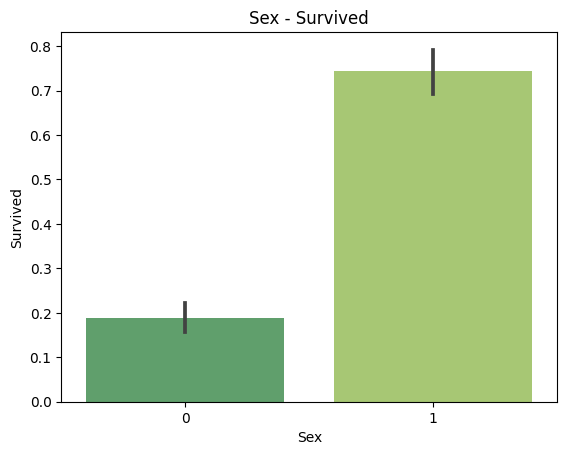

In [ ]:
sns.barplot(x='Sex', y='Survived', data=df, palette='summer')
plt.title('Sex - Survived')
plt.show()

Let's look how a combination of a person's gender and ticket class (Pclass) affect survival rates

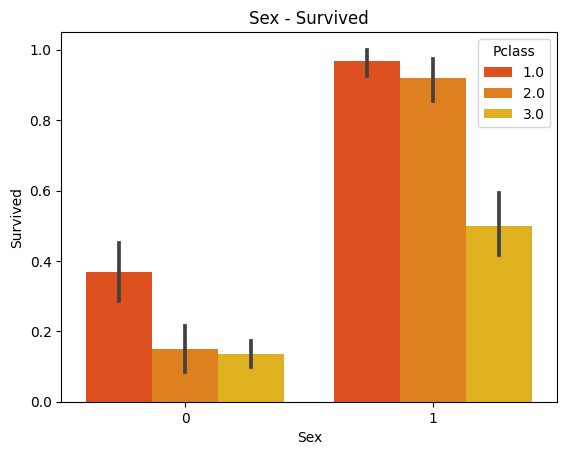

In [ ]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df, palette='autumn')
plt.title('Sex - Survived')
plt.show()

Another useful type of visualization is the box plot box. Let's look at a box plot that reflects the distribution of passengers by gender and age.

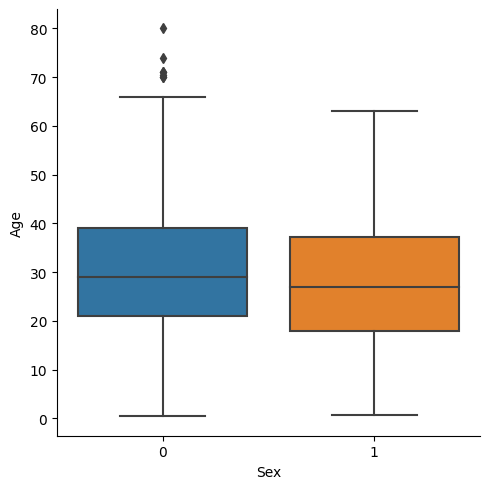

In [ ]:
sns.catplot(x="Sex", y="Age", data=df, kind="box")
plt.show()

We can detail the picture by adding Pclass separation.

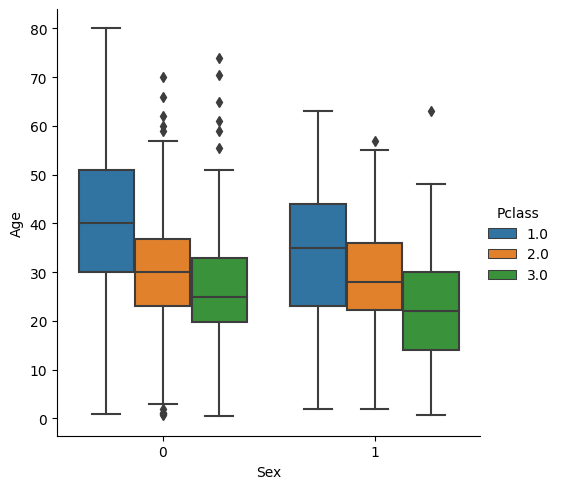

In [ ]:
sns.catplot(x="Sex", y="Age",hue ="Pclass", data=df, kind="box")
plt.show()

## Process the 'Embarked' feature

In [ ]:
print(df['Embarked'].value_counts(dropna=False))
df.shape

S      641
C      168
Q       75
NaN      2
Name: Embarked, dtype: int64


(886, 12)

### Task 6 (0.5pt)
Remove passengers from the table for whom the port of embarkation (Embarked) is unknown.

In [ ]:
# your code here
df.dropna(subset=['Embarked'], inplace=True)


Let's convert the categorical column to numeric columns using One-Hot Encoding, namely, create three numeric columns as follows:

In [ ]:
df['EmbS'] = df.apply(lambda row: 1 if row.Embarked == 'S' else 0, axis=1)
df['EmbC'] = df.apply(lambda row: 1 if row.Embarked == 'C' else 0, axis=1)
df['EmbQ'] = df.apply(lambda row: 1 if row.Embarked == 'Q' else 0, axis=1)

This operation can be done using the `get_dummies` method.

In [ ]:
pd.get_dummies(df['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


### Task 7 (0.5pt)
Remove the categorical column `Embarked` from the table and add new columns to it, obtained using `get_dummies`.

In [ ]:
# your code here
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Emb')
df = pd.concat([df, embarked_dummies], axis=1)
df.drop('Embarked', axis=1, inplace=True)

## Process the 'Age' feature

Check if `Age` has any missing values.

In [ ]:
df.Age.isna().sum()

175

Let's fill in the blanks with the median `Age` value.

In [ ]:
median_age = df['Age'].median()

df['Age'].fillna(median_age, inplace=True)

Let's plot the age distribution of the passengers.

In [ ]:
sns.distplot(df['Age'], kde=False)
plt.show()

We can also look at the age distribution of `Pclass`.

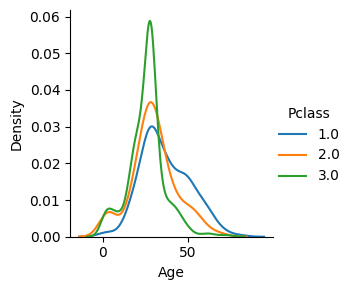

In [ ]:
import seaborn as sns

facet = sns.FacetGrid(data=df, hue="Pclass", legend_out=True)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend();

### Process the 'Fare' feature (0.5pt)

1) Check if there are any missing values in `Fare`

2) If there are missing values, fill them with the _median_ value of `Fare`

In [ ]:
# your code here
print(df['Fare'].isna().sum())
if df['Fare'].isna().sum() > 0:
  median_fare = df['Fare'].median()
  df['Fare'].fillna(median_fare, inplace=True)

### Process the 'Pclass' feature

Are there any missing values in `Pclass`?

In [ ]:
df['Pclass'].value_counts(dropna=False)

3.0    485
1.0    216
2.0    183
Name: Pclass, dtype: int64

### Task 8 (0.5pt)
Draw a histogram of survival rates as a function of `Pclass`.

In [ ]:
#your code here
survival_rates = df.groupby('Pclass')['Survived'].mean()
sns.barplot(x=survival_rates.index, y=survival_rates.values)
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.title('Survival Rates by Pclass')
plt.show()

### Process the feature 'SibSp' (number of siblings, husbands, wives)

Are there any missing values in `SibSp`?

In [ ]:
# your code here
df['SibSp'].isna().sum()

### Task 9 (0.5 pt)
The `PassengerId` column is categorical and does not carry important information, delete it.

In [ ]:
#your code here
df.drop('PassengerId', axis=1, inplace=True)

## **Additional Task - 2.5 pt**  

You have now gained experience in **handling missing data, encoding categorical features, and visualizing data**. Let’s put everything together and apply your skills to a **real-world challenge**.  

---  

**You Are a Loan Officer at a Major Bank**

Your job is to **analyze loan approval trends** to help your bank make better lending decisions.  

**The Manager's Belief:**  
Your manager believes that **people with higher credit scores** always get approved for loans.  

**However**, you think other factors (like employment status and income) play a big role too! To prove your point, you need to **analyze the data and create visualizations**.  

---  

# Your Task:

To convince your manager, you need to:  

1 - **Clean the dataset** by handling missing values. (Credit Score)  
2 - **Convert categorical values into numbers** using encoding. (Emplyment Status)  
3 - **Create a box plot** comparing Credit Scores between approved and denied loans.  
4 - **Comment on the results** — does Credit Score **guarantee** approval, or do other factors matter?  

---  

**Important Details:**  
- Customers **without a recorded Credit Score** should be removed from the analysis.  
- Your manager **does not trust loans under $1,000**, so exclude them from the dataset.  


C:\Users\User\AppData\Local\Temp\ipykernel_36504\353269471.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Employment_Status'] = df['Employment_Status'].replace({'Unemployed': 0, 'Employed': 1})


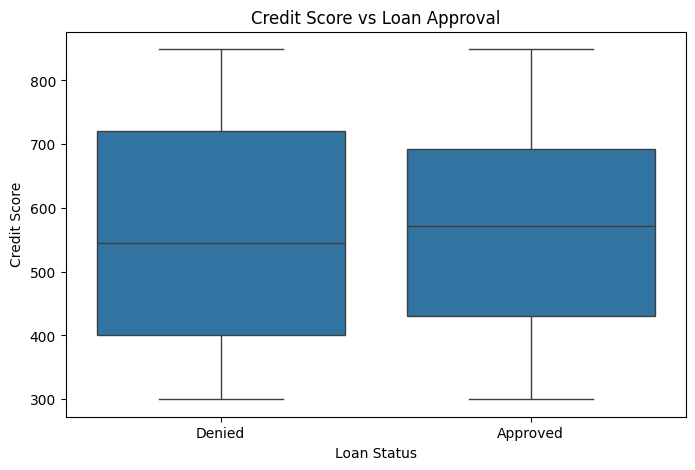

In [ ]:
# Load the dataset

# Remove rows where Credit Score is missing

# Remove loans under $1,000

# Convert Employment Status into numbers

# Create box plot

# Theoretical Questions- 2.5 pt

Answer the following questions based on your coding implementation and analysis in this assignment.  

1 - Why do we use `.fillna()` with `median()` for numerical values and `mode()` for categorical values when handling missing data?   

2 - What is the purpose of replacing categorical text values (e.g., "Employed", "Unemployed") with numbers in the dataset? Describe how this affects machine learning models and why `.replace()` or one-hot encoding is used.  

3 - In the box plot comparing Credit Score and Loan Approval, what does the distribution tell us?

4 - Why do we exclude loans under $1,000 from the dataset? How might this impact our analysis?  

5 - What would happen if we didn’t remove missing values from the Credit Score column before visualization?


In [ ]:
1. Using the median to fill missing numerical values helps to preserve the overall distribution of the data and minimizes the impact of extreme values, Categorical values (using mode()): The mode represents the most frequent category in a categorical variable. Filling missing categorical values with the mode ensures that we are using the most common category as a substitute
2. Purpose: Most machine learning algorithms work with numerical data. Replacing categorical text values with numbers allows these algorithms to process and understand the categorical features. Effect on machine learning models: Numerical representation of categorical features enables models to learn patterns and relationships between these features and the target variable. Without this conversion, many algorithms would not be able to utilize the information contained in categorical features
3. The box plot comparing Credit Score and Loan Approval would visually show the distribution of credit scores for approved and denied loans.
4. Loans under $1,000 might be excluded because they are considered less representative of typical loan applications or might have different approval criteria.
5. If missing values in the Credit Score column are not handled before visualization, several issues could arise:
firstly Incomplete visualization, Distorted insights and Errors in calculations